# Descargar noticias de un medio digital

En esta práctica vamos a descargar los titulares de las noticias de un medio de comunicación digital

## Importar las librerías que necesitaremos

Vamos a utilizar urllib3 y Beautiful Soup

    conda install beautifulsoup4 urllib3 nltk
    

## Instalamos el beautifulsoup4 urllib3 nltk
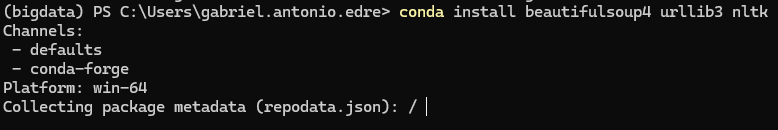

In [8]:
#!/usr/bin/env python

import urllib3, nltk
from bs4 import BeautifulSoup

#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

## Descargar la página

Emplearemos un UserAgent (navegador) de móvil para identificarnos con la página

In [9]:
ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

http = urllib3.PoolManager()
#medioDigital= "http://20minutos.es"
#medioDigital= "http://www.elpais.com"
#medioDigital= "http://www.elmundo.es"
medioDigital= "http://www.lavozdegalicia.es"
r = http.request('GET', medioDigital, fields=None, headers=h)


## Quitar código HTML

In [10]:
sopa = BeautifulSoup(r.data, "html.parser")
web_solotexto = sopa.get_text()

salida = ''
#excluirlineas=4

for linea in web_solotexto.split('\n'):
    aux=linea.strip()
    if aux and len(aux) > 50:
        salida += aux + '\n'
        #if not aux.startswith('Comentarios ('):
        #    excluirlineas=excluirlineas-1
        #    if (excluirlineas < 0):
        #        vartext2 = vartext2 + aux + '\n'

#print (salida)

#Otra forma, quizás más elegante:
titulares = sopa.find_all('h4')

aux = []
for titular in titulares:
    aux.append(titular.get_text().strip())

global clean_texto
clean_texto = " ".join(aux)

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser", "de", "el", "en", "que", "000", "tras"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

def FormatearCadena():
    global clean_texto
    #Reemplazamos signos de puntuación por "":
    for sw in stop_words:
        clean_texto = clean_texto.lower().replace(" "+sw+" "," ")
        
    for p in punctuation:
        clean_texto = clean_texto.replace(p," ")

    #Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
    #clean_texto = " ".join(clean_texto.split())    

    #Reemplazamos stop_words por "":    
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)
    
    print(clean_texto)

FormatearCadena()

xunta gobierno cierran acuerdo transferir gestión litoral galicia koldo niega supremo financiación irregular psoe ábalos cobrara mordidas gobierno eleva 30 oferta aseguradoras renovar concierto muface raphael ingresado urgencia accidente cerebrovascular confesión sito miñanco grabación policía fastidiaba llamaran jefe suponía seis años condena grupo gunvor promueve almacén 43 metros cúbicos betún vilagarcía así coro pétreo mestre mateo catedral santiago policía nacional detiene dueño agencia viajes coruña vendió cerca 300 vuelos validar muere actriz marisa paredes gobierno cambia ley incluir derecho rectificación redes sociales pilar alegría podría mesa ministra concejal pueblo condena louzán pablo amallo corral liderará básquet coruña momento clave pelea boiro salda hombre uci dos falanges agresor abuelo árbitro balonmano expone sanción 60 650 euros servicio secreto ucraniano mata jefe armas químicas ejército ruso superliga propone nuevo formato competición cerrado partidos gratis vec

In [11]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
galicia,7
2025,6
pablo,6
dos,6
años,5
así,5
gobierno,5
santiago,4
muere,4
españa,4


In [12]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

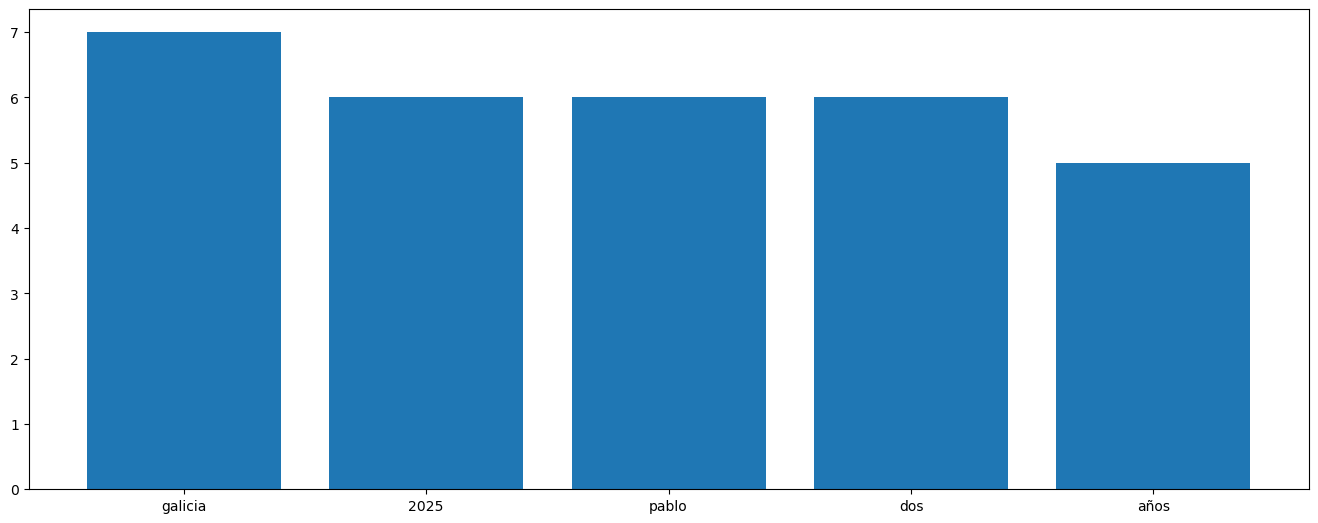

In [13]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

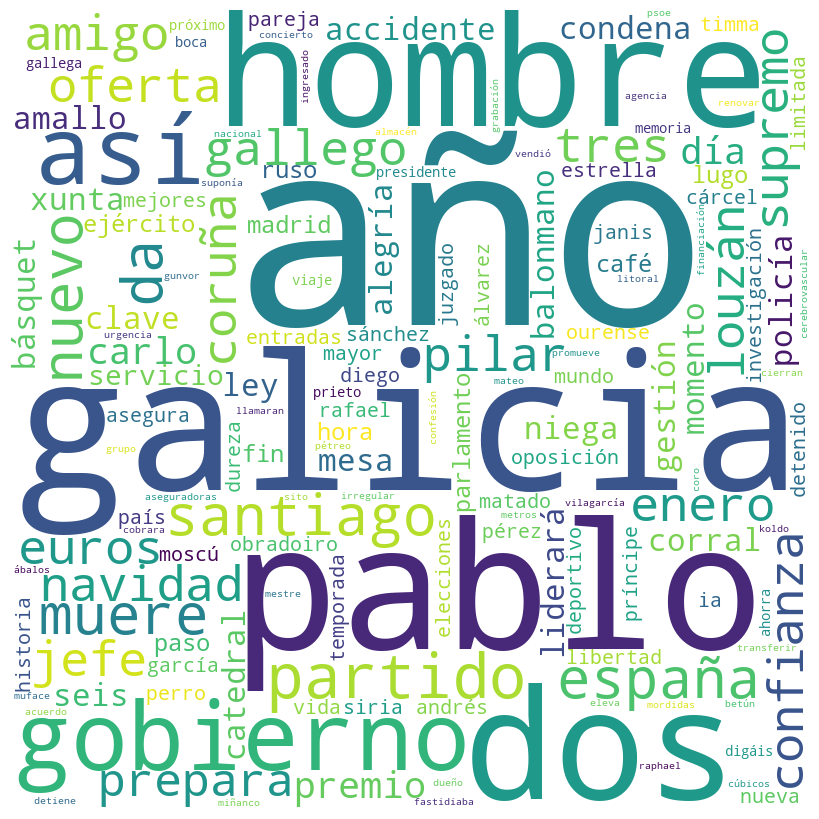

In [14]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()